# More with the Definite Integral

$$\int_a^b f(x) dx = \lim_{n \to \infty}\sum_{i = 1}^n f(x_i^*) \Delta x$$

**WARM UP**

1. Evaluate the following definite integral.  Interpret the integral as an area, and describe the region with a graph.

$$\int_{0} ^4 8x^3 - x^2 dx$$

2. Suppose the function $8x^3 - x^2$ represents the velocity of a car in miles per hour at a time $x$.  Interpret the integral: $\int_{0} ^4 8x^3 - x^2 dx$

3. Suppose the function $8x^3 - x^2$ represents the rate at which water flows through a canal in ft$^3$.  Interpret the integral: $\int_{0} ^4 8x^3 - x^2 dx$.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### More Rules of Integrals

<table style="background-color: #f1f1c1" >
<tr>
   <td>$\displaystyle \int x^n dx = \frac{x^{n+1}}{n+1} + C$</td>
   <td>$\displaystyle \int e^{ax} dx = \frac{1}{a} e^{ax} + C$</td>
    <td>$\displaystyle \int \ln(x)dx = x\ln(x) - x + C$</td>
 </tr>
<tr>
    <td>$\displaystyle \int \sin(x) dx = -\cos(x) + C$</td>
    <td>$\displaystyle \int \cos(x) dx = \sin(x) + C$</td>
    <td>$\displaystyle \int a^x dx = \frac{a^x}{\ln a} + C$</td>
    </tr>

Your goal is to identify the appropriate rule to use for evaluating the given integral and then try to evaluate given definite integral.  Plot the results and interpret the answer as an area under the curve.

1. $\displaystyle \int_0^{3\pi} \sin(x) dx$

2. $\displaystyle \int_0^4 \cos(x) + x^2 dx$

3. $\displaystyle \int_1^{10} \ln(x) - 2^x + 4$

### Computing Solutions

We can use our computer to evaluate definite integrals.  Consider the definite integral:

$$\int_0^4 x^2 dx$$

In [2]:
import scipy.integrate as integrate

In [3]:
x = np.linspace(0, 4, 1000)
def f(x): return x**2

In [4]:
integrate.quad(f, 0, 4)

(21.333333333333336, 2.368475785867001e-13)

In [5]:
def f(x): return np.sin(x)

In [6]:
integrate.quad(f, 0, 2*np.pi)

(2.221501482512777e-16, 4.3998892617845996e-14)

### Pure Symbolic Computing

This is the other side of the coin from using something like a Riemann sum, and we are dealing with symbols as opposed to numbers here.  Accordingly, we introduce the symbolic representations using the library `SymPy` that is used for symbolic computing in Python.  

In [7]:
import sympy as sy

In [8]:
#define the symbol
x = sy.Symbol('x')

In [9]:
#define the function
def f(x): return x**2

In [10]:
#evaluate the integral 
#format is (function, (with respect to, start, stop))
sy.integrate(f(x), (x, 0, 4))

64/3

$$\int_2^5 x^3 - \cos(x) + \ln(x) - e^{4x}$$

In [11]:
##similar to with numbers(NumPy)
def f(x): return x**3 - sy.cos(x) + sy.log(x) + sy.exp(4*x)

In [12]:
sy.integrate(f(x), (x, 2, 5))

-exp(8)/4 - 2*log(2) + sin(2) - sin(5) + 5*log(5) + 597/4 + exp(20)/4

### Application I: Area Between Curves

Consider the functions $f(x) = x^2$ and $g(x) = \sqrt{x}$.  How might we compute the area between the curves?

<center>
    <img src = 'images/p8e1.png' />
    </center>

### A Creative Exercise

Definite Integral Art: Determining a beautiful region and its area.

In [13]:
from ipywidgets import interact
import ipywidgets as widgets
def fun_plotter(a, b, c, d, e):
    def f(x): return a*x**2 + b*np.sin(c*x - d*x**2) + e
    def g(x): return a*x**2 - b*np.sin(c*x - d*x**2) - e
    x = np.linspace(-2, 2, 1000)
    plt.figure(figsize = (15, 6))
    plt.plot(x, f(x), color = 'black')
    plt.plot(x, g(x), color = 'black')
    plt.fill_between(x, f(x), g(x), where = (f(x) > g(x)), color = 'green', alpha = 0.4)

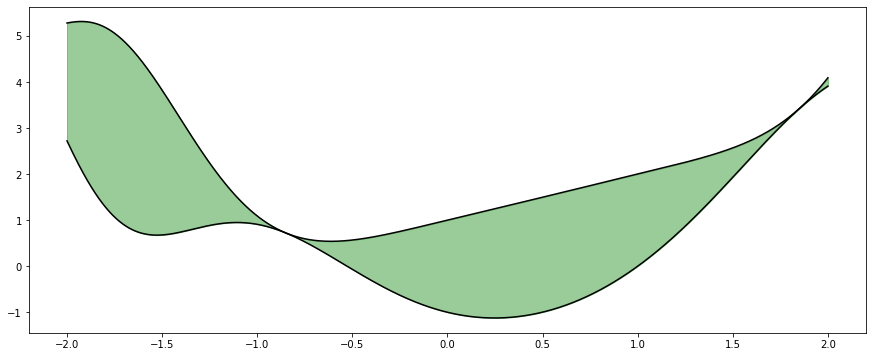

In [14]:
interact(fun_plotter, 
        a = widgets.IntSlider(1, min = -3, max = 3),
        b = widgets.IntSlider(1, min = -3, max = 3),
        c = widgets.IntSlider(1, min = -3, max = 3),
        d = widgets.IntSlider(1, min = -3, max = 3),
        e = widgets.IntSlider(1, min = -3, max = 3));

### Functions in Higher Dimensions

In [15]:
from mpl_toolkits.mplot3d import Axes3D

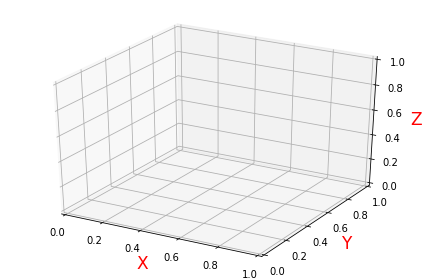

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('X', fontsize = 17, color = 'red')
ax.set_ylabel('Y', fontsize = 17, color = 'red')
ax.set_zlabel('Z', fontsize = 17, color = 'red')
plt.tight_layout()

In [17]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
def f(x,y): return -(x**2 + y**2)

In [18]:
f(2, 4)

-20

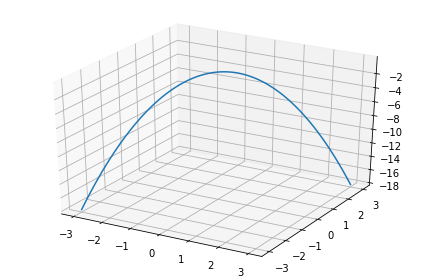

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot(x, y, f(x, y))
plt.tight_layout()

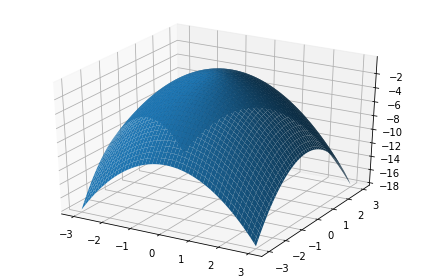

In [20]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z)
plt.tight_layout()

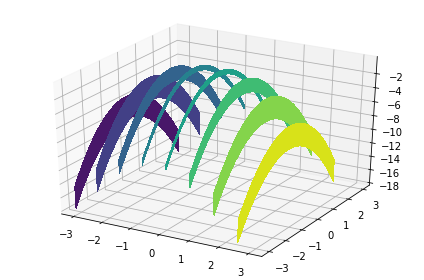

In [21]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.contourf(X, Y, Z, zdir = 'x')
plt.tight_layout()

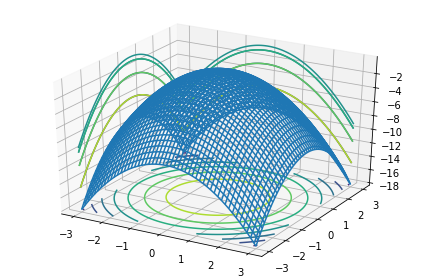

In [22]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_wireframe(X, Y, Z)
ax.contour(X, Y, Z, zdir = 'x', offset = -3)
ax.contour(X, Y, Z, zdir = 'y', offset = 3)
ax.contour(X, Y, Z, zdir = 'z', offset = -18)
plt.tight_layout()

Text(0.5, 1, 'Heights of Rectangles on a Grid')

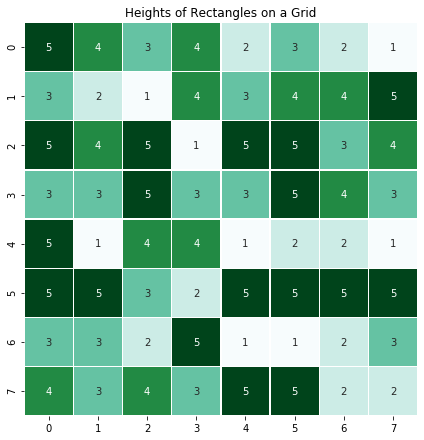

In [24]:
import seaborn as sns
grid = np.linspace(-3, 3, 10)
X, Y = np.meshgrid(grid, grid)
a = np.random.randint(1, 6, 64).reshape(8,8)
plt.figure(figsize = (6,6))
sns.heatmap(a, annot = True, 
            linewidths = 0.5, cmap="BuGn", 
            cbar = False, 
            square = True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t)
plt.tight_layout()
plt.title('Heights of Rectangles on a Grid')

In [25]:
l = min(top)

NameError: name 'top' is not defined

In [ ]:
m = max(top)

NameError: name 'cmap' is not defined

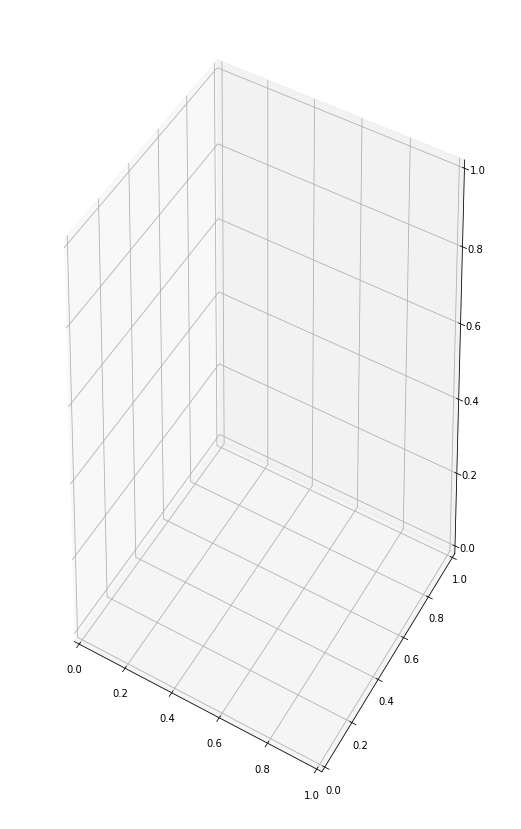

In [30]:
x = np.arange(8)
y = np.arange(8)
X, Y = np.meshgrid(x, y)
x, y = X.ravel(), Y.ravel()

top = 2*x**2 - x*y
bottom = np.zeros_like(top)
width = depth = 1


# cmap = cm.get_cmap('jet')
l = min(top)
m = max(top)

fig = plt.figure(figsize = (20, 15))
ax = fig.add_subplot(121, projection = '3d')
ax.bar3d(x, y, bottom, width, depth, top, alpha = 0.5, color = [cmap((k - l)/m) for k in top])
plt.tight_layout()
ax = fig.add_subplot(122, projection = '3d')
ax.bar3d(x, y, bottom, width, depth, top, alpha = 0.5, color = [cmap((k - l)/m) for k in top])
ax.view_init(elev = 10., azim = 180)

# plt.tight_layout()

In [31]:
import ipywidgets as widgets
from ipywidgets import interact
def bar_approximator(elev, azim):
    fig = plt.figure(figsize = (20, 15))
    ax = fig.add_subplot(111, projection = '3d')
    ax.bar3d(x, y, bottom, width, depth, top, alpha = 0.5, color = [cmap((k - l)/m) for k in top])
    ax.view_init(elev = elev, azim = azim)

NameError: name 'cmap' is not defined

<function __main__.bar_approximator(elev, azim)>

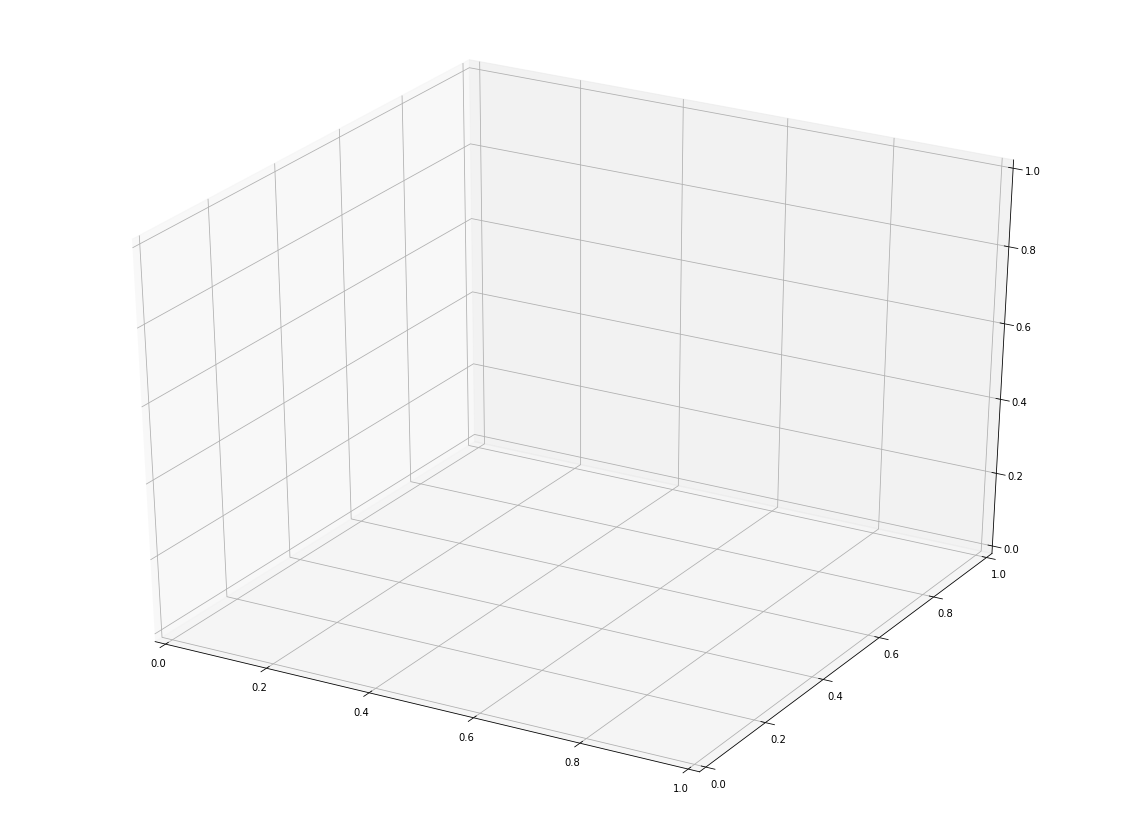

In [32]:
interact(bar_approximator, 
        elev = widgets.IntSlider(0, min = 0, max = 360),
        azim = widgets.IntSlider(0, min = 0, max = 360))

In [28]:
# x = np.linspace(0, 1, 100)
# def f(x): return x**2
# def g(x): return np.sqrt(x)

# fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))
# ax[0].plot(x, f(x), color = 'black')
# ax[0].fill_between(x, f(x), color = 'orange', alpha = 0.6)
# ax[0].set_title('$f(x) = x^2$')

# ax[1].plot(x, g(x), color = 'black')
# ax[1].fill_between(x, g(x), color = 'green', alpha = 0.5)
# ax[1].set_title('$g(x) = \sqrt{x}$')

# ax[2].plot(x, g(x), color = 'black', label = '$g(x)$')
# ax[2].plot(x, f(x), linestyle = '--', color = 'black', label = '$f(x)$')
# ax[2].fill_between(x, f(x), g(x), color = 'yellow', alpha = 0.6)
# ax[2].fill_between(x, f(x), color = 'lightblue', alpha = 0.5)
# ax[2].legend()
# plt.savefig('images/p8e1.png')

In [1]:
import name_caller as namer

In [3]:
namer.your_turn()

'What do you think Seba'